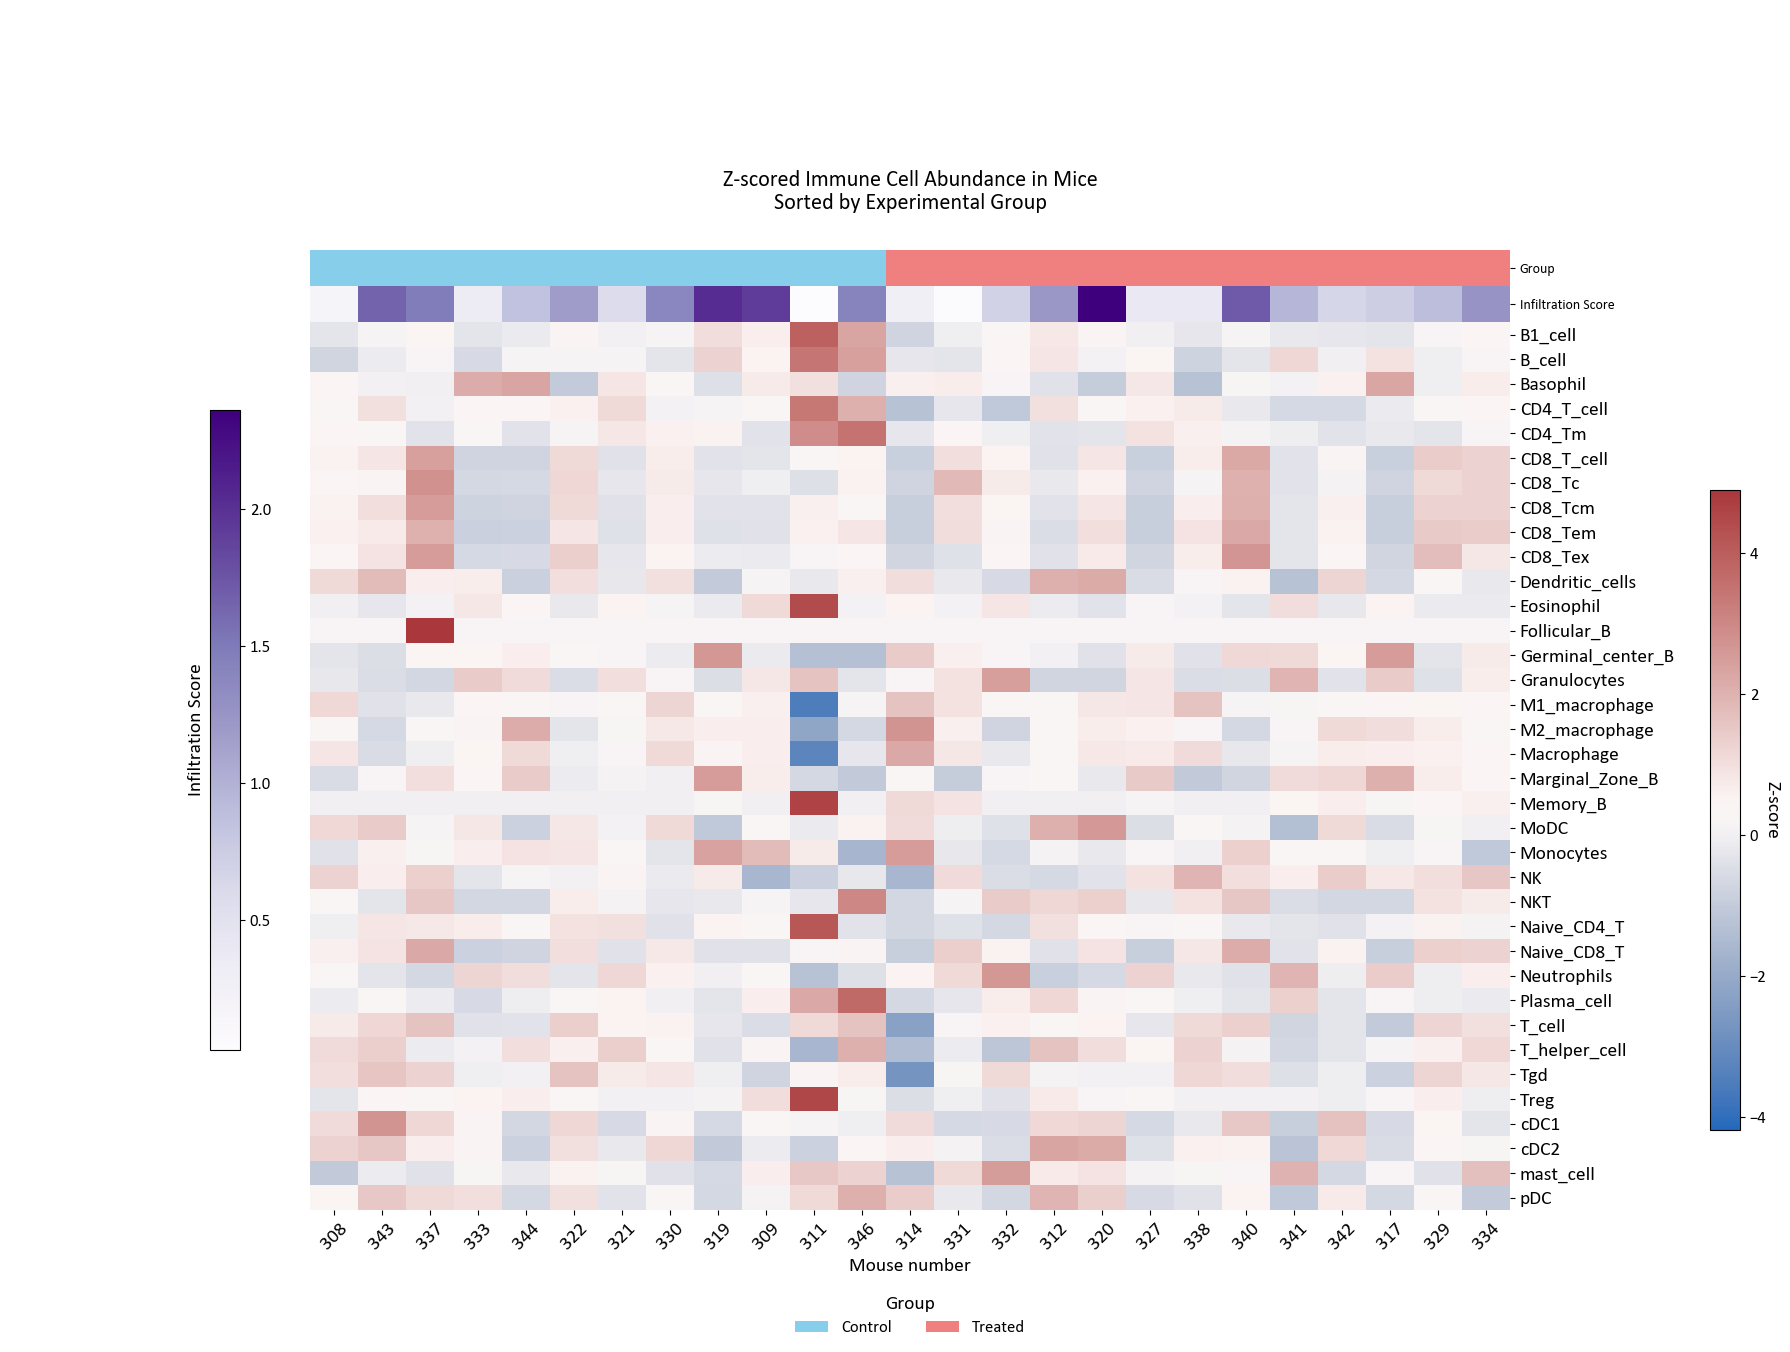

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from scipy.stats import zscore

plt.rcParams['font.family'] = 'Calibri'

file_path = "ImmuCellAI_mouse_abundance_result_threshold_9.xlsx"
df = pd.read_excel(file_path)
df.set_index("Mouse number", inplace=True)
df_sorted = df.sort_values("Group")

# Data preparation
cell_types = df.columns.difference(['Group', 'Infiltration_score'])
zscored = df_sorted[cell_types].apply(zscore)

# Colours - goups
group_palette = {'Control': 'skyblue', 'Treated': 'lightcoral'}
group_colors = df_sorted['Group'].map(group_palette)

# Colours - infiltration score
norm = Normalize(vmin=df_sorted['Infiltration_score'].min(), vmax=df_sorted['Infiltration_score'].max())
cmap = plt.cm.Purples
infiltration_colors = df_sorted['Infiltration_score'].map(lambda x: cmap(norm(x)))

# Colourbar - colour settings
col_colors = pd.DataFrame({
    'Group': group_colors,
    'Infiltration Score': infiltration_colors
}, index=df_sorted.index)

# Clustermap
g = sns.clustermap(
    zscored.T,
    cmap="vlag",
    center=0,
    col_colors=col_colors,
    col_cluster=False,
    row_cluster=False,
    xticklabels=True,
    yticklabels=True,
    figsize=(20, 16),
    cbar_pos=None  # Deactivation - default colourbar
)

# Z-score normalization - custom colourbar
norm_zscore = Normalize(vmin=zscored.min().min(), vmax=zscored.max().max())  # Normalization
sm = ScalarMappable(cmap="vlag", norm=norm_zscore)

# Custom colourbar - right site (Z-score)
cbar_ax = g.fig.add_axes([1.0, 0.2, 0.015, 0.4])  # Position and width - colourbar
cbar = g.fig.colorbar(sm, cax=cbar_ax)  # Addition - colourbar
cbar.set_label("Z-score", fontsize=14, rotation=-90, labelpad=10)  # Title parameters - colourbar
cbar.ax.tick_params(labelsize=12)  # Size of ticks - corourbar

# Title
g.fig.suptitle("Z-scored Immune Cell Abundance in Mice\nSorted by Experimental Group", fontsize=16, x=0.6, y=0.8)

# Legend for groups - bottom 
legend_patches = [Patch(facecolor=color, label=label) for label, color in group_palette.items()]
g.ax_heatmap.legend(
    handles=legend_patches,
    title="Group",
    title_fontsize=14,
    fontsize=12,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.08),
    ncol=2,
    frameon=False
)

# Colourbar - left site
cbar_ax_infiltration = g.fig.add_axes([0.25, 0.25, 0.015, 0.4]) # Parameters
cbar_infiltration = g.fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap),
    cax=cbar_ax_infiltration
)
cbar_infiltration.set_label('Infiltration Score', fontsize=14, labelpad=-60, rotation=90)
cbar_infiltration.ax.tick_params(labelsize=12)

# More space
g.fig.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.15)

# Size of ticks - X and Y axis
g.ax_heatmap.set_xlabel("Mouse number", fontsize=14)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize=14, rotation=45)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=14)
#plt.savefig('Z-scored Immune Cell Abundance in Mice.png', bbox_inches='tight', pad_inches=0.1)
plt.show()